* [Source](https://docs.ray.io/en/latest/data/overview.html#batch-inference-overview)

# Offline Batch Inference

* Offline batch inference is a process for generating model predictions on a fixed set of input data. <br>
        <img src="https://docs.ray.io/en/latest/_images/stream-example.png" width="500"/> <br>

# Preprocessing and ingest for ML Training

* Use Ray Data to load and preprocess data for distributed ML training pipelines in a streaming fashion.
* Key supported features for distributed training include :
    * Fast out-of-memory recovery
    * Support for heterogeneous clusters
    * No dropped rows during distributed dataset iteration.

* Ray Data serves as a last-mile bridge from storage or ETL pipeline outputs to distributed applications and libraries in Ray. Use it for unstructured data processing: <br>
    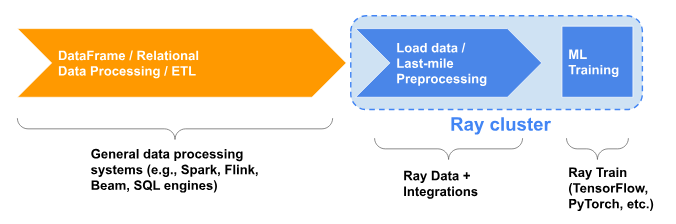

# Datasets

* Ray Data’s main abstraction is a Dataset, which is a distributed data collection. 
* Datasets are designed for machine learning, and they can represent data collections that exceed a single machine’s memory.
* [Dataset API](https://docs.ray.io/en/latest/data/api/dataset.html#ray.data.Dataset)

In [1]:
from typing import Dict
import numpy as np
import ray

### Loading Data

* [Loading Data](https://docs.ray.io/en/latest/data/loading-data.html)

In [2]:
# Create datasets from on-disk files, Python objects, and cloud storage like S3.
ds = ray.data.read_csv("s3://anonymous@ray-example-data/iris.csv")
ds.show(3)

2024-11-06 21:11:17,522	INFO worker.py:1807 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
2024-11-06 21:11:22,436	INFO dataset.py:2529 -- Tip: Use `take_batch()` instead of `take() / show()` to return records in pandas or numpy batch format.
2024-11-06 21:11:22,450	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in D:\TEMP\Temp\ray\session_2024-11-06_21-11-06_160122_21996\logs\ray-data
2024-11-06 21:11:22,451	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> LimitOperator[limit=3]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- limit=3 2: 0.00 row [00:00, ? row/s]

{'sepal length (cm)': 5.1, 'sepal width (cm)': 3.5, 'petal length (cm)': 1.4, 'petal width (cm)': 0.2, 'target': 0}
{'sepal length (cm)': 4.9, 'sepal width (cm)': 3.0, 'petal length (cm)': 1.4, 'petal width (cm)': 0.2, 'target': 0}
{'sepal length (cm)': 4.7, 'sepal width (cm)': 3.2, 'petal length (cm)': 1.3, 'petal width (cm)': 0.2, 'target': 0}


### Transforming Data
* [Transforming data](https://docs.ray.io/en/latest/data/transforming-data.html)
* Ray executes transformations in parallel for performance.

In [3]:
# Apply functions to transform data. Ray Data executes transformations in parallel.
def compute_area(batch: Dict[str, np.ndarray]) -> Dict[str, np.ndarray]:
    length = batch["petal length (cm)"]
    width = batch["petal width (cm)"]
    batch["petal area (cm^2)"] = length * width
    return batch

transformed_ds = ds.map_batches(compute_area)
print(transformed_ds.materialize())

2024-11-06 21:11:26,065	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in D:\TEMP\Temp\ray\session_2024-11-06_21-11-06_160122_21996\logs\ray-data
2024-11-06 21:11:26,069	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> TaskPoolMapOperator[MapBatches(compute_area)]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- MapBatches(compute_area) 2: 0.00 row [00:00, ? row/s]

MaterializedDataset(
   num_blocks=24,
   num_rows=150,
   schema={
      sepal length (cm): double,
      sepal width (cm): double,
      petal length (cm): double,
      petal width (cm): double,
      target: int64,
      petal area (cm^2): double
   }
)


In [4]:
transformed_ds.show(5)

2024-11-06 21:11:28,935	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in D:\TEMP\Temp\ray\session_2024-11-06_21-11-06_160122_21996\logs\ray-data
2024-11-06 21:11:28,936	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> TaskPoolMapOperator[MapBatches(compute_area)] -> LimitOperator[limit=5]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- MapBatches(compute_area) 2: 0.00 row [00:00, ? row/s]

- limit=5 3: 0.00 row [00:00, ? row/s]

{'sepal length (cm)': 5.1, 'sepal width (cm)': 3.5, 'petal length (cm)': 1.4, 'petal width (cm)': 0.2, 'target': 0, 'petal area (cm^2)': 0.27999999999999997}
{'sepal length (cm)': 4.9, 'sepal width (cm)': 3.0, 'petal length (cm)': 1.4, 'petal width (cm)': 0.2, 'target': 0, 'petal area (cm^2)': 0.27999999999999997}
{'sepal length (cm)': 4.7, 'sepal width (cm)': 3.2, 'petal length (cm)': 1.3, 'petal width (cm)': 0.2, 'target': 0, 'petal area (cm^2)': 0.26}
{'sepal length (cm)': 4.6, 'sepal width (cm)': 3.1, 'petal length (cm)': 1.5, 'petal width (cm)': 0.2, 'target': 0, 'petal area (cm^2)': 0.30000000000000004}
{'sepal length (cm)': 5.0, 'sepal width (cm)': 3.6, 'petal length (cm)': 1.4, 'petal width (cm)': 0.2, 'target': 0, 'petal area (cm^2)': 0.27999999999999997}


### Consuming data

* Pass datasets to Ray Tasks or Actors, and access records with methods like `take_batch()` and `iter_batches()`.

In [5]:
print(transformed_ds.take_batch(batch_size=3))

2024-11-06 21:11:30,050	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in D:\TEMP\Temp\ray\session_2024-11-06_21-11-06_160122_21996\logs\ray-data
2024-11-06 21:11:30,050	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> TaskPoolMapOperator[MapBatches(compute_area)] -> LimitOperator[limit=3]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- MapBatches(compute_area) 2: 0.00 row [00:00, ? row/s]

- limit=3 3: 0.00 row [00:00, ? row/s]

{'sepal length (cm)': array([5.1, 4.9, 4.7]), 'sepal width (cm)': array([3.5, 3. , 3.2]), 'petal length (cm)': array([1.4, 1.4, 1.3]), 'petal width (cm)': array([0.2, 0.2, 0.2]), 'target': array([0, 0, 0]), 'petal area (cm^2)': array([0.28, 0.28, 0.26])}


### Saving Data

In [6]:
# Save dataset contents to on-disk files or cloud storage.
transformed_ds.write_parquet("data/write_parquet")

2024-11-06 21:11:30,658	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in D:\TEMP\Temp\ray\session_2024-11-06_21-11-06_160122_21996\logs\ray-data
2024-11-06 21:11:30,659	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> TaskPoolMapOperator[MapBatches(compute_area)->Write]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- MapBatches(compute_area)->Write 2: 0.00 row [00:00, ? row/s]

2024-11-06 21:11:31,915	INFO datasink.py:103 -- Write operation succeeded. Aggregated write results:
	- num_rows: 150
	- size_bytes: 7200



### Reload Data

In [7]:
ds2 = ray.data.read_parquet(r'data\write_parquet')
ds2.schema()

Metadata Fetch Progress 0:   0%|          | 0.00/8.00 [00:00<?, ? task/s]

Parquet Files Sample 0:   0%|          | 0.00/2.00 [00:00<?, ? file/s]

Column             Type
------             ----
sepal length (cm)  double
sepal width (cm)   double
petal length (cm)  double
petal width (cm)   double
target             int64
petal area (cm^2)  double

In [8]:
print(ds.stats())

Operator 1 ReadCSV->SplitBlocks(24): 1 tasks executed, 5 blocks produced in 1.3s
* Remote wall time: 165.4us min, 1.29s max, 258.23ms mean, 1.29s total
* Remote cpu time: 0.0us min, 15.62ms max, 3.12ms mean, 15.62ms total
* UDF time: 0us min, 0us max, 0.0us mean, 0us total
* Peak heap memory usage (MiB): 135.66 min, 135.98 max, 135 mean
* Output num rows per block: 7 min, 7 max, 7 mean, 35 total
* Output size bytes per block: 280 min, 280 max, 280 mean, 1400 total
* Output rows per task: 35 min, 35 max, 35 mean, 1 tasks used
* Tasks per node: 1 min, 1 max, 1 mean; 1 nodes used
* Operator throughput:
	* Ray Data throughput: 26.990878008634798 rows/s
	* Estimated single node throughput: 27.107245635094145 rows/s

Operator 2 limit=3: 1 tasks executed, 1 blocks produced in 1.29s
* Remote wall time: 1.29s min, 1.29s max, 1.29s mean, 1.29s total
* Remote cpu time: 15.62ms min, 15.62ms max, 15.62ms mean, 15.62ms total
* UDF time: 0us min, 0us max, 0.0us mean, 0us total
* Peak heap memory usag

In [9]:
for batch in ds2.iter_batches(batch_size=20, batch_format='numpy'):
    print(batch)

2024-11-06 21:11:32,765	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in D:\TEMP\Temp\ray\session_2024-11-06_21-11-06_160122_21996\logs\ray-data
2024-11-06 21:11:32,766	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadParquet]


Running 0: 0.00 row [00:00, ? row/s]

- ReadParquet 1: 0.00 row [00:00, ? row/s]

{'sepal length (cm)': array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1]), 'sepal width (cm)': array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8]), 'petal length (cm)': array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5]), 'petal width (cm)': array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'petal area (cm^2)': array([0.28, 0.28, 0.26, 0.3 , 0.28, 0.68, 0.42, 0.3 , 0.28, 0.15, 0.3 ,
       0.32, 0.14, 0.11, 0.24, 0.6 , 0.52, 0.42, 0.51, 0.45])}
{'sepal length (cm)': array([5.4, 5.1, 4.6, 5.1, 4.8, 5. , 5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2,
       5.5, 4.9, 5. , 5.5, 4.9, 4.4, 5.1]), 'sepal width (cm)': array([3.4, 3.7, 3.6, 3.3, 3.4, 3. , 3.4, 3.5, 3.4, 3.2, 3.

# E2E: Offline Batch Inference

In [10]:
from typing import Dict
import numpy as np
import torch
import torch.nn as nn

import ray

In [12]:
# Step 1: Create a Ray Dataset from in-memory Numpy arrays.
ds = ray.data.from_numpy(np.ones((1, 100)))
ds.schema()

Column  Type
------  ----
data    numpy.ndarray(shape=(100,), dtype=double)

In [13]:
# Step 2: Define a Predictor for inference.
# Use a class to initialize the model just once in `__init__`
# and re-use it for inference across multiple batches.
class TorchPredictor:
    def __init__(self):
        # Load a dummy neural network.
        # Set `self.model` to your pre-trained PyTorch model
        self.model = nn.Sequential(
            nn.Linear(in_features=100, out_features=1),
            nn.Sigmoid(),
        )

        self.model.eval()
    # Logic for inference on 1 batch of data.
    def __call__(self, batch: Dict[str, np.ndarray]) -> Dict[str, np.ndarray]:
        tensor = torch.as_tensor(batch['data'], dtype=torch.float32)
        with torch.inference_mode():
            # Get the predictions from the input batch.
            return {"output": self.model(tensor).numpy()}
        

In [14]:
# Step 2: Map the Predictor over the Dataset to get predictions.
# Use 2 parallel actors for inference. Each actor predicts on a different partition of data.
predictions = ds.map_batches(TorchPredictor, concurrency=2)

In [15]:
# Step 3: Show one prediction output.
predictions.show(limit=1)

2024-11-06 21:24:44,472	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in D:\TEMP\Temp\ray\session_2024-11-06_21-11-06_160122_21996\logs\ray-data
2024-11-06 21:24:44,473	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> ActorPoolMapOperator[MapBatches(TorchPredictor)] -> LimitOperator[limit=1]


Running 0: 0.00 row [00:00, ? row/s]

- MapBatches(TorchPredictor) 1: 0.00 row [00:00, ? row/s]

- limit=1 2: 0.00 row [00:00, ? row/s]

2024-11-06 21:24:50,829	WARNING actor_pool_map_operator.py:265 -- To ensure full parallelization across an actor pool of size 2, the Dataset should consist of at least 2 distinct blocks. Consider increasing the parallelism when creating the Dataset.


{'output': array([0.68897325], dtype=float32)}
